# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing//RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_30_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.682591,0.640214,0.842022,1.000000,0.625993,0.912529,0.971557,0.587310,0.863040,0.974497
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.682591,0.713747,0.726861,0.694015,0.625993,0.903036,0.666040,0.587310,0.863040,0.958581
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.682591,0.763067,0.747376,0.869025,0.625993,0.898032,0.888588,0.587310,0.863040,0.980335
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.669220,0.481977,0.797865,0.931136,0.624581,0.873870,0.826337,0.564337,0.855268,0.945490
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.677685,0.745493,0.772651,0.902087,0.613038,0.896762,0.767579,0.552830,0.857563,0.948794


In [3]:
X = data[['AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)
    else:
        Y.append(2)
print(X)


     AC005307.1  ATP5G2P1    DLGAP4  EIF4A1P9  FAM172BP   FAM224A      GJA9  \
0      0.898634  0.673138  0.909389  0.758691  0.716166  0.858590  0.896883   
1      0.898634  0.673138  0.909006  0.758691  0.716166  0.858590  0.889567   
2      0.898634  0.673138  0.969120  0.954047  0.716166  0.858590  0.841131   
3      0.894698  0.654761  0.936171  0.877898  0.865741  0.851019  0.814810   
4      0.896845  0.663879  0.958324  0.746849  0.702019  0.853550  0.858627   
..          ...       ...       ...       ...       ...       ...       ...   
139    0.893909  0.683394  0.946660  0.772952  0.903675  0.852969  0.813319   
140    0.898634  0.673138  0.943755  0.758691  0.716166  0.858590  0.923364   
141    0.896845  0.663879  0.921780  0.746849  0.702019  0.853550  0.909013   
142    0.896845  0.874054  0.958130  0.839283  0.702019  0.853550  0.879108   
143    0.896845  0.663879  0.934254  0.746849  0.702019  0.853550  0.895707   

       GPR155      GYPE      IL25  ...  RP11-96O20.

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=2, n_estimators=10, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.6


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9130434782608695
Final accuracy on the testing dataset: 0.5862068965517241


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[66  0  0]
 [ 5 22  0]
 [ 5  0 17]]
Input data:  [0 0 2 2 0 1 0 1 1 1 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 2 2 2 0 0 0 2 1 0 0 0 2
 1 0 0 0 0 2 1 1 0 1 0 1 0 0 2 1 2 0 0 0 0 1 0 2 2 1 0 0 0 0 2 0 2 2 0 0 0
 0 2 1 0 0 1 1 0 2 0 0 0 0 2 1 1 0 0 2 1 0 2 0 1 1 0 2 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 0 2 0 1 0 1 1 1 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 1 0 0 0 2
 0 0 0 0 0 2 1 1 0 1 0 1 0 0 2 0 2 0 0 0 0 1 0 2 2 1 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 0 1 0 0 2 0 0 0 0 2 1 1 0 0 2 1 0 0 0 1 1 0 2 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        66
           1       1.00      0.81      0.90        27
           2       1.00      0.77      0.87        22

    accuracy                           0.91       115
   macro avg       0.96      0.86      0.90       115
weighted avg       0.92      0.91      0.91       115



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[17  1  1]
 [ 3  0  1]
 [ 6  0  0]]
Input data:  [2 0 2 0 0 2 2 0 2 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 0 1 0]
Prediction:        [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.65      0.89      0.76        19
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6

    accuracy                           0.59        29
   macro avg       0.22      0.30      0.25        29
weighted avg       0.43      0.59      0.50        29



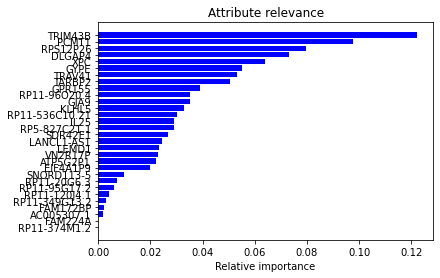

AC005307.1 = 0.0017335238755119531
ATP5G2P1 = 0.022059622865593032
DLGAP4 = 0.07323608112408594
EIF4A1P9 = 0.020029535413607046
FAM172BP = 0.002328457446854443
FAM224A = 0.0
GJA9 = 0.035002358078463754
GPR155 = 0.03908596350371553
GYPE = 0.05522347967745454
IL25 = 0.02912891674845929
KLHL5 = 0.032811370092656264
LANCL1-AS1 = 0.024457336389236313
LEMD1 = 0.023437431139340312
PCMT1 = 0.09758685798539948
RP11-120J4.1 = 0.0041127725541357145
RP11-20G6.3 = 0.007095583022000135
RP11-349G13.2 = 0.0030883056127195283
RP11-374M1.2 = 0.0
RP11-536C10.21 = 0.030133460313301153
RP11-95G17.2 = 0.0059113186300028455
RP11-96O20.4 = 0.03529199240439919
RP5-827C21.1 = 0.029094204978375525
RPS12P26 = 0.07969750258314033
SDR42E1 = 0.026571891696861593
SNORD113-5 = 0.010058432911754173
TARBP2 = 0.050576943271014654
TRAV41 = 0.05325282568095111
TRIM43B = 0.12214700746460765
VN2R17P = 0.022909759817903008
XPC = 0.06393706471845549


In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.